#4.2.2  농구선수의 게임데이터를 활용한 포지션 예측





In [51]:
# 필요한 모듈 임포트
import pandas as pd

# 데이터 획득(교재와 달리 구글 코랩에서 직접 입력 받기)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/csv/basketball_stat.csv")

#수집된 데이터 샘플 확인
df.head() # 처음 5개의 데이터만 입력



,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [52]:
#현재 데이터에서 포지션의 개수를 확인한다.
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

Text(0.5, 1.0, 'AST and 2P in 2d plant')

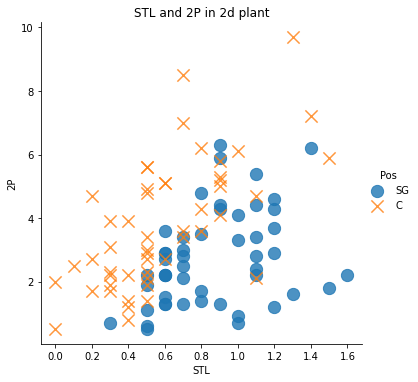

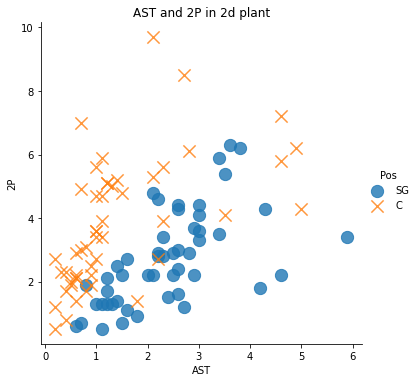

In [53]:
# 3점슛(3P), TRB(리바운드), BLK(블로킹)만 필요한 속성인 것을 입증하기 위한 시각화 작업

# 시각화에 필요한 묘듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
# 브라우저 내부에 그림 그리기
%matplotlib inline

# 스틸과 2점슛 데이터 시각화(x축과 y축 값 앞에 "x="와 "y="를 입력해야 경고 메시지 안 뜸.)
sns.lmplot(x ='STL', y='2P', data=df, fit_reg=False, #x축, y축 데이터, 라인x
            scatter_kws={"s":150}, # 좌표 상 점의 크기
            markers=["o","x"],
            hue="Pos") # 예측값

# 타이틀
plt.title("STL and 2P in 2d plant")

# 어시스트과 2점슛 데이터 시각화(x축과 y축 값 앞에 "x="와 "y="를 입력해야 경고 메시지 안 뜸.)
sns.lmplot(x ='AST', y='2P', data=df, fit_reg=False, #x축, y축 데이터, 라인x
            scatter_kws={"s":150}, # 좌표 상 점의 크기
            markers=["o","x"],
            hue="Pos") # 예측값

# 타이틀
plt.title("AST and 2P in 2d plant")

In [54]:
# 분별력이 없는 특징을 데이터에서 제거합니다.
df.drop(["2P","AST","STL"], axis=1, inplace= True) 
df.head() # axis =1 -> col제거 , axis = 0 -> row제거

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [55]:
# 사이킷런의 train_test_split을 사용하여 학습 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split

#다듬어진 데이터에서 임의로 20%를 데스트 데이터로 분류
train, test = train_test_split(df,test_size=0.2)
train.shape[0] #학습 데이터 수 출력

80

In [56]:
test.shape[0] # 테스트 데이터 수 출력

20

In [57]:
# 사이킷런으로부터 kNN 함수 추가
from sklearn.neighbors import KNeighborsClassifier
# 사이킷런으로부터 k-폴드 교차 검증 함수 추가
from sklearn.model_selection import cross_val_score

#전체 데이터 수가 100개 이므로 데이터의 수가 적어 k-폴드 교차 검증을 실행하기로 함.

#최적의 k를 찾기 위해 교차검증을 수행할 k의 범위를 3부터 학습데이터 절반까지 지정.
max_k_range = train.shape[0] // 2 # // -> 나누기 후 소수점 이하 버림.
k_list = [] # 사용자 정의 리스트(즉, 배열)생성
for i in range(3,max_k_range,2): # for(i=3;i< max_k_range;i+=2)와 동일
    k_list.append(i) #k_list에 저장되는 값 : 3,5,7,...,39 총 19개

cross_validation_scores = [] # 사용자 정의 리스트 생성
x_train = train[["3P","BLK","TRB"]] # 입력 데이터
y_train = train[['Pos']] # 출력 데이터(정답),즉 레이블(lable)

#교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장.
for k in k_list: # k_list에 저장된 값을 하나씩 뽑아 k에 저장한 후, for문 반복 수행
    knn = KNeighborsClassifier(n_neighbors=k) #KNN 모델 정의
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, #k(여기서는 10) 폴드 교차 검증 실행
        scoring='accuracy') # 성능 평가 지표 -> 정확도 # ravel() : y_train의 값을 1차원 배열로 만듦
    cross_validation_scores.append(scores.mean())      # 즉 [[SG],[C],[SG],...]를 [SG,C,SG,...]로 변경
                            # scores에는 k(10)번 실행한 각 정확도 결과가 저장됨
cross_validation_scores # k-폴드 교차 검증의 최종 결과 19개 저장값 출력

[0.9125,
 0.925,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.85,
 0.85,
 0.8375,
 0.85,
 0.85,
 0.85]

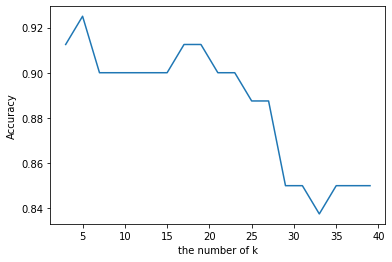

In [58]:
# cross_valdation_scores의 19개 결과 값의 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [59]:
#가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 5


##모델 테스트하기(테스트 데이터로 실제 테스트하는 부분)

In [64]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train.values.ravel())

x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

print("accuracy : "+str(accuracy_score(y_test.values.ravel(),pred)*100)+"%" )

accuracy : 80.0%


In [61]:
#실제값과 예측된 값 확인
comparison = pd.DataFrame({'prediction':pred,'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,SG
2,C,C
3,SG,SG
4,C,SG
5,SG,SG
6,SG,SG
7,C,SG
8,C,C
9,C,C


In [81]:
import numpy as np

# 샘플 데이터
x_sample = pd.DataFrame(np.array([[2, 0.1, 2], [0, 1, 6]]))
display(x_sample)

# 학습된 모델
knn = KNeighborsClassifier(k)
knn.fit(x_train,y_train.values.ravel())

# 예측
prediction = knn.predict(x_sample)

# 예측값
pd.DataFrame({'prediction':prediction})


,0,1,2
0,2.0,0.1,2.0
1,0.0,1.0,6.0


,prediction
0,SG
1,C
